Example adapted from previous Advanced Python workshop at PNI ([link](https://github.com/yisiszhang/AdvancedPython/blob/main/colab/Lecture5.ipynb))

## Import, load dataset
Getting a sense of what is in the dataset.

In [1]:
import numpy as np
from torchvision.datasets import MNIST
import matplotlib.pyplot as plt

from helper import *

In [2]:
# download and save MNIST data to "data/" folder
dataset = MNIST(root='data/', train=True, download=True)


Failed to download (trying next):
HTTP Error 403: Forbidden



12.2%

100.0%


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



In [3]:
# each data is a 28x28 image
# select a data index
ind = 79

# the shape of one image
height, width = dataset.data[ind].shape
print(f"Shape of the selected image: ({height}x{width})")

# image label
print("Image label: ", dataset.targets[ind])

# total number of data
n_data = len(dataset)
print(f"Dataset contains {n_data} objects/images")
     

Shape of the selected image: (28x28)
Image label:  tensor(7)
Dataset contains 60000 objects/images


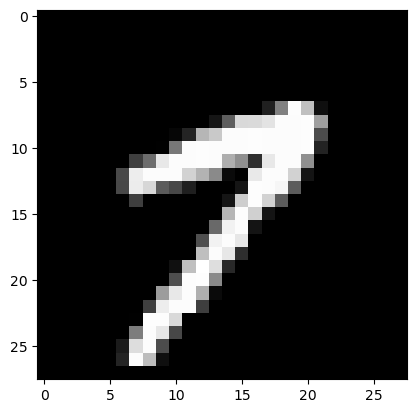

In [4]:
show_grayscale(dataset.data[ind])

## Visualize dataset

In [5]:
X = dataset.data
X = X.reshape((n_data, -1)) # what's the shape now
y = dataset.targets 

Text(0, 0.5, 'Pixel0')

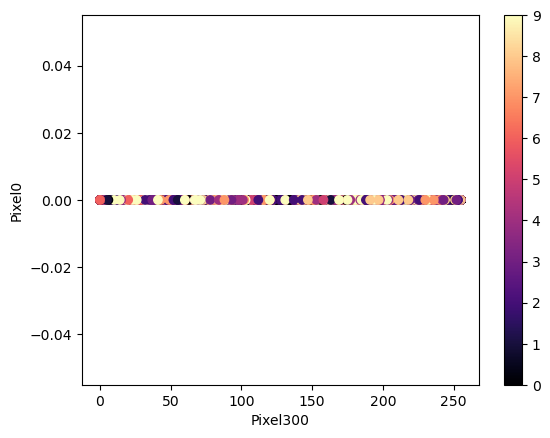

In [6]:
pidx, pidy = 300, 0
plt.scatter(X[:, pidx], X[:, pidy], c=y, cmap="magma")
plt.colorbar()
plt.xlabel(f"Pixel{pidx}")
plt.ylabel(f"Pixel{pidy}")

Do a PCA on the data?

In [7]:
from sklearn.decomposition import PCA

In [8]:
pca = PCA()
X_transformed = pca.fit_transform(X)

Text(0, 0.5, 'PC1')

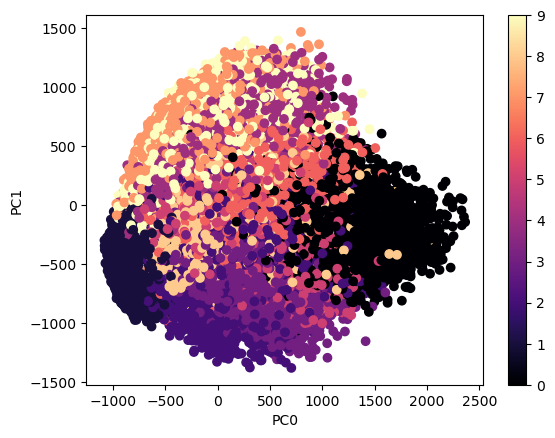

In [9]:
pcx, pcy = 0, 1
plt.scatter(X_transformed[:, pcx], X_transformed[:, pcy], c=y, cmap="magma")
plt.colorbar()
plt.xlabel(f"PC{pcx}")
plt.ylabel(f"PC{pcy}")

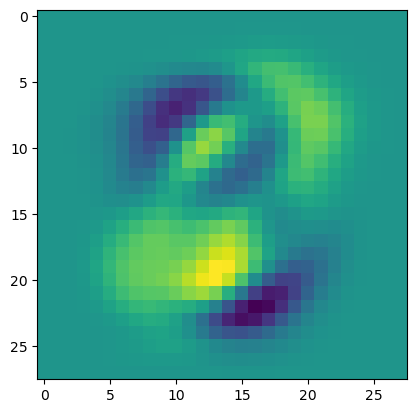

In [10]:
components = pca.components_
pc = components[2,:].reshape(28, 28)
plt.imshow(pc)

---
## Basic concepts of building a neural network!

First define the activation function.

In [11]:
# define a sigmoid function
def sigmoid(x):
  return 1/(1+np.exp(-x))

# define a logistic unit (neuron)
def neuron(x, theta):
  # # add 1 as the first element
  # # to multiply with bias
  # x = np.insert(x, 0, 1) 
  
  z = np.dot(x, theta)
  return sigmoid(z)

### A toy example of weights (and biases)

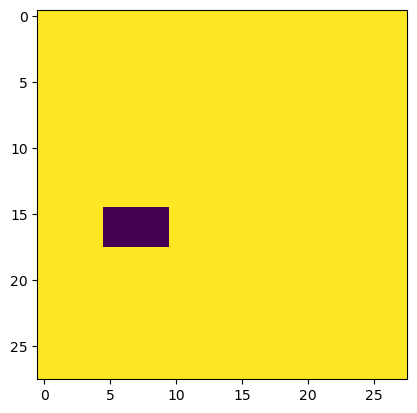

In [12]:
theta = np.zeros((28,28))
theta[15:18,5:10] = -1

# make some sense of theta
plt.imshow(theta)
plt.show()

# flatten theta
theta = theta.flatten()

# # optionally, add biases to theta
# bias = 2
# theta = np.insert(theta.flatten(), 0, bias)

0.0


/var/folders/r1/g8r4ph9s3h19bwdkrc7h_7sc0000gn/T/ipykernel_99037/1014120607.py:3: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-x))


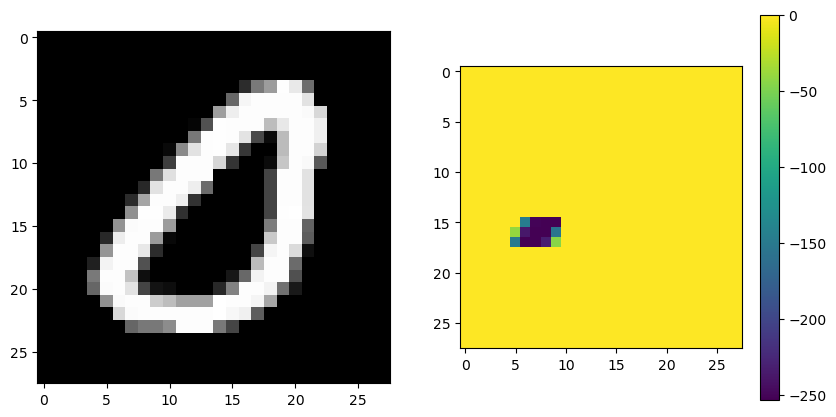

In [13]:
# how does theta work on data?
idx = 689
x = X[idx,:]

# visualize x1 and x2
f, axs = plt.subplots(1, 2, figsize=(10, 5))
show_grayscale(x.reshape(height, width), ax=axs[0])
masked = axs[1].imshow(np.multiply(x, theta).reshape(height, width))
plt.colorbar(masked)

print(neuron(x, theta))

The above gives us some intuitions into how neurons in a neural network could work: they take inputs (as a weighted sum of data and weights and sometimes biases) and compute an output with its activation function. However, it is not sustainable for us to define each of the neurons in a neural network. Luckily, the pytorch package offers many tools for us to build neural networks from scratch. See more detailed specification [here](https://pytorch.org/docs/stable/nn.html).

In [14]:
import torch
import torch.nn as nn

An example: Linear layer
> `nn.Linear` Applies a linear transformation to the incoming data $y=xA^T + b$

In [15]:
# start with something light
n_inputs = 3
n_outputs = 1

layer = nn.Linear(n_inputs, n_outputs)

In [16]:

# now we setup a simple network, let's take a look at what it has
print(layer)
print(layer.weight)
print(layer.bias)

# what are the rows and columns of weights?

Linear(in_features=3, out_features=1, bias=True)
Parameter containing:
tensor([[ 0.0758, -0.1603, -0.3961]], requires_grad=True)
Parameter containing:
tensor([0.4718], requires_grad=True)


The weights of a linear layer is by default sampled from a uniform distirubtion $\mathcal{U}(-\sqrt{k}, \sqrt{k})$ where $k=\frac{1}{\text{in\_features}}$. Of course, there are ways to initialize our layers such that the weights are sampled from our desired distributions.

In [17]:
layer.weight.data.normal_(mean=0, std=1/n_inputs)

tensor([[-0.0572,  0.0885,  0.0792]])

In [18]:
# create an input vector
x = torch.ones((3,))
print("input = :\n", x)

input = :
 tensor([1., 1., 1.])


In [19]:

# we can evaluate the output through the network with the input using forward() function
print("output = :\n", layer.forward(x))
# we can also simply feed x into layer and it should do the same thing as forward()
print(layer(x))

output = :
 tensor([0.5823], grad_fn=<ViewBackward0>)
tensor([0.5823], grad_fn=<ViewBackward0>)


In [20]:
# A simplest network consists of a nn.Linear layer and an activition function
class Network(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear = nn.Linear(2,1)    # self.linear is used locally
    self.activation = nn.Sigmoid()  # self.activation is used locally
  
  def forward(self, x):
    o = self.linear(x)      # calculate the linear output
    o = self.activation(o)  # pass the output through the activation function

    return o

In [21]:
# test this neural network
x = torch.ones((2,))
net = Network()
print(net(x))

tensor([0.2175], grad_fn=<SigmoidBackward0>)


## Train the neural network with Gradient Descent
One of the most important ideas in neural network has to be "gradient descent." Whose gradient you might ask?

To train a neural network, we want to define some lost function $\mathcal{L}$ to "judge" how well our network is performing. $\mathcal{L}$ usually takes the form of $\mathcal{L} = \sum_i \alpha_i \mathcal{L}_i$ where $\alpha_i$ are weights/coefficents and $\mathcal{L}_i$ reflects the loss of certain criteria (for example, it can be $|\text{target} - \text{prediction}|$). If you look closely, $\mathcal{L}$ is a function of the parameters (weights, biases) in the network.

If we can find the minimum of this loss function, we get the best parameters for our neural networks, right? However, since we have so many parameters (potentially over many layers), we cannot really know "where" exactly is the minimum (on a global scale)... Instead, we can easily find out how this function behaves on a more local scale, by calculating the gradient of the loss and taking a step in the direction opposite to where $\mathcal{L}$ will grow.